In [1]:
import bs4
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
root = "https://statisticalatlas.com"

In [4]:
first_page = root + "/state/Pennsylvania/Overview"

In [5]:
html = requests.get(first_page)

In [6]:
soup = BeautifulSoup(html.content,'html.parser')

In [7]:
counties = soup.select("div.info-table-contents-div a")

In [17]:
overview_url = []
for county in counties:
    url = county['href']
    url = url.replace("/Overview","")
    if(url.startswith("/county")):
        overview_url.append(url)

In [20]:
overview_url = list(set(overview_url))

In [11]:
categories = soup.select("nav#contents-nav a")

In [12]:
categories_list = []
for category in categories:
    c = category.text.strip()
    if c!="Overview":
        categories_list.append(c)

In [33]:
def get_overview_information(county,category):
    county = county.replace(" ", "-")
    category = category.replace(" ", "-")
    for url in overview_url:
        if county in url:
            url_link = requests.get(root+url+"/"+category)
            county_soup = BeautifulSoup(url_link.content,'html.parser')
            return county_soup

In [34]:
a = get_overview_information("Adams County", "Educational Attainment")

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="Statistical Atlas: The Demographic Statistical Atlas of the United States" name="description"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/assets/all_203ec713e48e08e8330f8c155243d9ac.css" rel="stylesheet" type="text/css"/>
<link href="/assets/logos/statistical-atlas-logo-16_770dd16483278df54fae584705f16d41.png" rel="shortcut icon" type="image/png"/>
<script type="text/javascript">
if(typeof console == 'undefined')console={};if(typeof console.log == 'undefined')console.log=function(){};
</script>
<script src="/assets/all_d842a8eece0f346f51348240ec027f81.js" type="text/javascript"></script>
<!--[if lt IE 9]>
<script src="/assets/javascripts/html5.js" type="text/javascript"></script>
<![endif]-->
<script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<script>
  (adsbygoogle = window
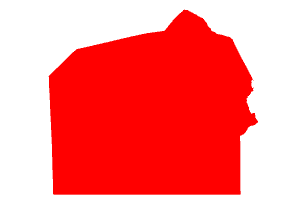
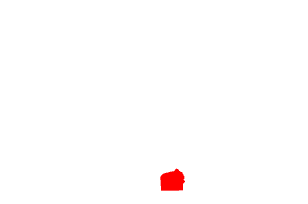
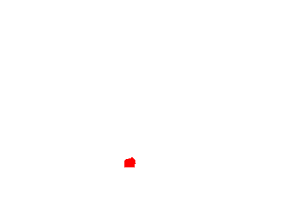
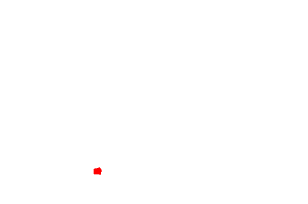
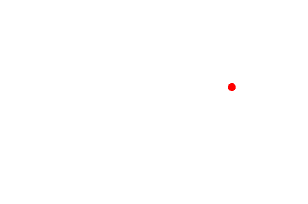
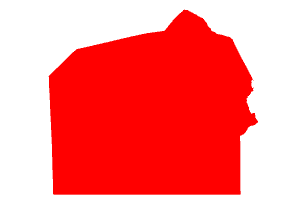
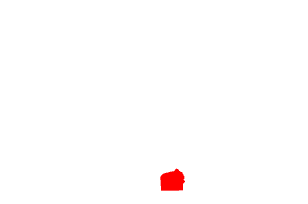
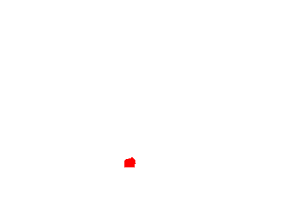
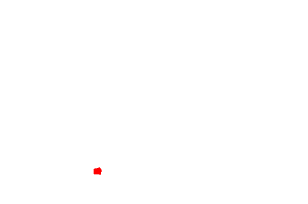
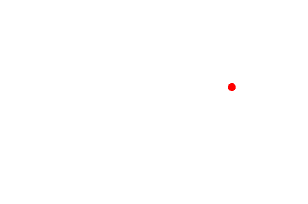

In [35]:
a